In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib matplotlib
import cmcrameri.cm as cmc  # Importing the cmcrameri colormaps

In [5]:
%run figures.py 'hta_2deg.nc' -c volume
data = data['volume'].isel(file_num=7)
ds = data

In [6]:
def sum_variables(xarray_obj, var_names, new_var_name):
    """
    Sums specified variables in an xarray object element-wise and adds the result as a new variable.
    
    Parameters:
    xarray_obj (xr.Dataset): The xarray Dataset containing the variables.
    var_names (list of str): A list of variable names to sum.
    new_var_name (str): The name of the new variable to store the sum.
    
    Returns:
    xr.Dataset: The modified xarray Dataset with the new summed variable.
    """
    # Check if all variable names exist in the xarray object
    missing_vars = [var for var in var_names if var not in xarray_obj.data_vars]
    if missing_vars:
        raise ValueError(f"The following variables are not in the xarray object: {missing_vars}")
    
    # Initialize a zero-filled DataArray based on the first variable's shape and coordinates
    sum_var = xr.zeros_like(xarray_obj[var_names[0]])
    
    # Sum the variables element-wise
    for var_name in var_names:
        print(xarray_obj[var_name].isnull().sum())
        sum_var += xarray_obj[var_name]
    
    # Add the summed variable to the xarray object
    xarray_obj[new_var_name] = sum_var
    
    return xarray_obj



In [7]:

primary_minerals = ['Forsterite', 'Fayalite', 'Microcline', 'Ferrosilite(al', 
                    'Enstatite(alph', 'Diopside', 'Anorthite', 'Albite(low)']
secondary_minerals = ['Hsaponite(Mg)', 'Clinochlore', 'Chamosite(Daph', 'Celadonite', 'Quartz(alpha)',
                     'Chrysotile', 'Talc', 'Actinolite', 'Tremolite', 'Epidote', 'Clinozoisite',
                     'Hematite', 'Natrolite', 'Anhydrite', 'Calcite', 'Ilmenite']

clays = ['Hsaponite(Mg)', 'Celadonite', 'Chamosite(Daph', 'Clinochlore']
zeolites = ['Natrolite']
amphiboles = ['Tremolite', 'Actinolite']
serpentinites = ['Chrysotile', 'Talc']
epidotes = ['Epidote', 'Clinozoisite']
oxides = ['Ilmenite', 'Hematite']
quartz = ['Quartz(alpha)']
anhydrite = ['Anhydrite']
calcite = ['Calcite']

olivine = ['Forsterite', 'Fayalite']
clinopyroxenes = ['Diopside']
orthopyroxenes = ['Enstatite(alph', 'Ferrosilite(al']
feldspars = ['Anorthite', 'Albite(low)', 'Microcline']


secondary_mineral_groups = {
    'clays': clays,
    'zeolites': zeolites,
    'amphiboles': amphiboles,
    'serpentinites': serpentinites,
    'epidotes': epidotes,
    'oxides': oxides,
    'quartz': quartz,
    'anhydrite': anhydrite,
    'calcite': calcite
}

primary_mineral_groups = {
    'olivine': olivine,
    'clinopyroxenes': clinopyroxenes,
    'feldspars': feldspars,
    'orthopyroxenes': orthopyroxenes

}

for group, minerals in primary_mineral_groups.items():
    data = sum_variables(data, minerals, group)

for group, minerals in secondary_mineral_groups.items():
    data = sum_variables(data, minerals, group)


data = sum_variables(data, primary_minerals, 'primary_minerals_VF')
data = sum_variables(data, secondary_minerals, 'secondary_minerals_VF')
data['percentage_alteration'] = data['secondary_minerals_VF'] / data['primary_minerals_VF'].isel(time=0) * 100

<xarray.DataArray 'Forsterite' ()>
array(0)
<xarray.DataArray 'Fayalite' ()>
array(0)
<xarray.DataArray 'Diopside' ()>
array(0)
<xarray.DataArray 'Anorthite' ()>
array(0)
<xarray.DataArray 'Albite(low)' ()>
array(0)
<xarray.DataArray 'Microcline' ()>
array(0)
<xarray.DataArray 'Enstatite(alph' ()>
array(0)
<xarray.DataArray 'Ferrosilite(al' ()>
array(0)
<xarray.DataArray 'Hsaponite(Mg)' ()>
array(0)
<xarray.DataArray 'Celadonite' ()>
array(0)
<xarray.DataArray 'Chamosite(Daph' ()>
array(0)
<xarray.DataArray 'Clinochlore' ()>
array(0)
<xarray.DataArray 'Natrolite' ()>
array(0)
<xarray.DataArray 'Tremolite' ()>
array(0)
<xarray.DataArray 'Actinolite' ()>
array(0)
<xarray.DataArray 'Chrysotile' ()>
array(0)
<xarray.DataArray 'Talc' ()>
array(0)
<xarray.DataArray 'Epidote' ()>
array(0)
<xarray.DataArray 'Clinozoisite' ()>
array(0)
<xarray.DataArray 'Ilmenite' ()>
array(0)
<xarray.DataArray 'Hematite' ()>
array(0)
<xarray.DataArray 'Quartz(alpha)' ()>
array(0)
<xarray.DataArray 'Anhydrite' 

In [8]:
ds['calcite'].isnull().any()

<xarray.DataArray 'calcite' ()>
array(False)

olivine: <xarray.DataArray 'olivine' ()>
array(False)
clinopyroxenes: <xarray.DataArray 'clinopyroxenes' ()>
array(False)
feldspars: <xarray.DataArray 'feldspars' ()>
array(False)
orthopyroxenes: <xarray.DataArray 'orthopyroxenes' ()>
array(False)
clays: <xarray.DataArray 'clays' ()>
array(False)
zeolites: <xarray.DataArray 'zeolites' ()>
array(False)
amphiboles: <xarray.DataArray 'amphiboles' ()>
array(False)
serpentinites: <xarray.DataArray 'serpentinites' ()>
array(False)
epidotes: <xarray.DataArray 'epidotes' ()>
array(False)
oxides: <xarray.DataArray 'oxides' ()>
array(False)
quartz: <xarray.DataArray 'quartz' ()>
array(False)
anhydrite: <xarray.DataArray 'anhydrite' ()>
array(False)
calcite: <xarray.DataArray 'calcite' ()>
array(False)


Text(0.5, 1.0, 'Stack Plot of Variables Summed over Specified Domain')

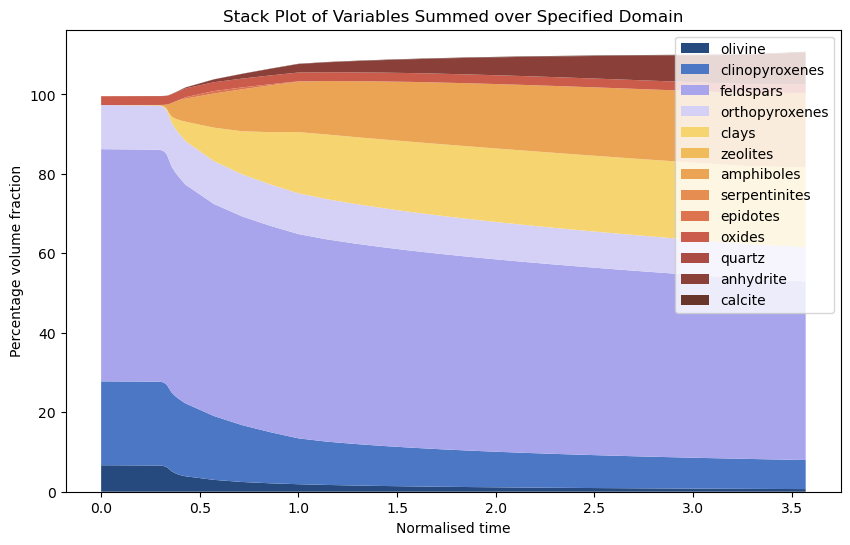

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import cmcrameri.cm as cm

# Select a sequential colormap from cmcrameri
# Define the number of groups (or layers) in the stack plot
# Extract colors from the colormap
colors_cool = cm.devon(np.linspace(0.2, 0.8, 4))  # Adjust 'num_groups' to the number of layers
colors_hot = cm.lajolla(np.linspace(0.2, 0.8, 9))
colors = np.vstack((colors_cool, colors_hot))
# Create a custom color cycler using the extracted colors
custom_cycler = cycler(color=colors)

def stack_plot(ax, ds, variable_groups, custom_cycler):
    variables = []
    for variable_group in variable_groups: 
        for minerals in variable_group.keys():
            variables.extend([minerals])

    # Condition to sum over a part of the domain, based on another variable 'condition_var'
    # For example, let's sum where 'condition_var' is greater than a threshold value

    ax.set_prop_cycle(custom_cycler)
    
    threshold = 10
    condition = ds['percentage_alteration'].isel(time=-1) > threshold

    normalised = condition.sum(dim=['X', 'Z', 'Y']) * 0.9
    # Calculate the sum of each variable over the specified condition
    sums = {}
    for var in variables:
        print(f'{var}: {ds[var].isnull().any()}')
        sums[var] = ds[var].where(condition).sum(dim=['X', 'Z', 'Y']) / normalised * 100 # Assuming 'x' and 'y' are spatial dimensions

    # Convert the sums into a stack plot
    # Assuming 'time' is the dimension you want to plot over
    stack_data = np.vstack([sums[var].values for var in variables])
    ax.stackplot(ds['time']/7000, stack_data, labels=variables)

    return ax


# List of variables to include in the stack plot

fig, ax = plt.subplots(figsize=(10, 6))

stack_plot(ax, ds, [primary_mineral_groups, secondary_mineral_groups], custom_cycler)

# Create the stack plot
ax.set_xlabel('Normalised time')
ax.set_ylabel('Percentage volume fraction')
ax.legend()
plt.title('Stack Plot of Variables Summed over Specified Domain')
